In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms
import numpy as np
from scipy.stats import nbinom
import scipy.stats as stats
from scipy.special import gamma
import pandas as pd
import random
from math import comb
import math
from pickle import dump
from pickle import load
from tqdm import tqdm
import itertools

## Network generating functions

In [12]:
def generate_premises_grid(m,n):
    
    base = nx.grid_2d_graph(m,n) 
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)
    return base

In [13]:
def generate_premises_er(n,p):
    s = random.randint(0, 1e14)
    base = nx.erdos_renyi_graph(n, p,seed = s)
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)
    return base

In [14]:
def generate_premises_power_law(n,p):
    s = random.randint(0, 1e14)
    deg_seq = nx.utils.powerlaw_sequence(n,p,seed = s) 
    for i in range(len(deg_seq)):
        deg_seq[i] = round(deg_seq[i])
    deg_seq = sorted(deg_seq)
    if sum(deg_seq)%2 !=0:
        deg_seq[-1] +=1

    
    base = nx.configuration_model(deg_seq)
    
    
    base.remove_edges_from(nx.selfloop_edges(base))
    base = nx.Graph(base)
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)

    
    
    return base
    

In [15]:
def generate_premises_grid_random(m,n,P,D):
    base = nx.create_empty_copy(nx.grid_2d_graph(m,n))
    
    
    edges = itertools.combinations(base.nodes, 2)

    for e in edges:
        ds = abs(e[0][0]-e[1][0])**2 + abs(e[0][1]-e[1][1])**2
        p = P*np.exp(-ds/(2*D*D))
        if random.uniform(0,1) < p:
            base.add_edge(*e)
    return base

In [16]:
def add_premise_attr(G,pop,T):
    node_attr = {}
    i=0
    for node in G.nodes():
        node_attr[node] = {"pop": pop[i],
                          "status":["S" for i in range(T+1)],
                          "zone" : False}
        i+=1
        
    for e in G.edges:
        G.get_edge_data(e[1],e[0])["weight"] = 1
    nx.set_node_attributes(G,node_attr)

In [17]:
def add_premise_pop(G,pop,T):
    node_attr = {}
    i=0
    for node in G.nodes():
        node_attr[node] = {"pop": pop[i]}
        i+=1
        
    for e in G.edges:
        G.get_edge_data(e[1],e[0])["weight"] = 1
    nx.set_node_attributes(G,node_attr)

## Generate Networks

In [179]:
n_gen_networks = 0
n = 100
power = (7*n-8)/(3*n-4)
grid_sum = 4*n*n-4*n
while n_gen_networks<10:
    deg_sum = -138947
    G = generate_premises_power_law(n*n,power)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\powerlaw" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1
        


In [180]:
n_gen_networks = 0
n = 100
power = 4/(n*(n-1))
grid_sum = 4*n*n-4*n
deg_sum = 0
while n_gen_networks<10:
    
    
    G = generate_premises_er(n*n,power)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\er" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1
        

In [183]:
n = 32
G = generate_premises_grid(100,100) 

filename = "networks\\grid.pkl"
with open((filename), 'wb') as f:
    dump(G,f)
            
        

In [40]:
Ds = 1
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.25*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=1_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [41]:
Ds = 1.5
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.15*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=1.5_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [42]:
Ds = 2
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.15*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=2_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [43]:
Ds = 3
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.19*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=3_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1

## Degree Plots

In [9]:
degrees_power = []
degrees_er = []
with open(('networks/grid.pkl'), 'rb') as f:
        G = load(f)
degrees_grid = [G.degree(n) for n in G.nodes]

for i in range(1,11,1):
  
    filename = "networks\\powerlaw" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_power.extend([G.degree(n) for n in G.nodes])
        
    filename = "networks\\er" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)    
    degrees_er.extend([G.degree(n) for n in G.nodes])

In [10]:
bins1= np.arange(1,101,1)
bins2 = np.arange(101,max(degrees_power)+10,100 )
bins3 = np.arange(0,3600,10)

In [11]:
sum([i for i in degrees_power if i ==1 ])

40447

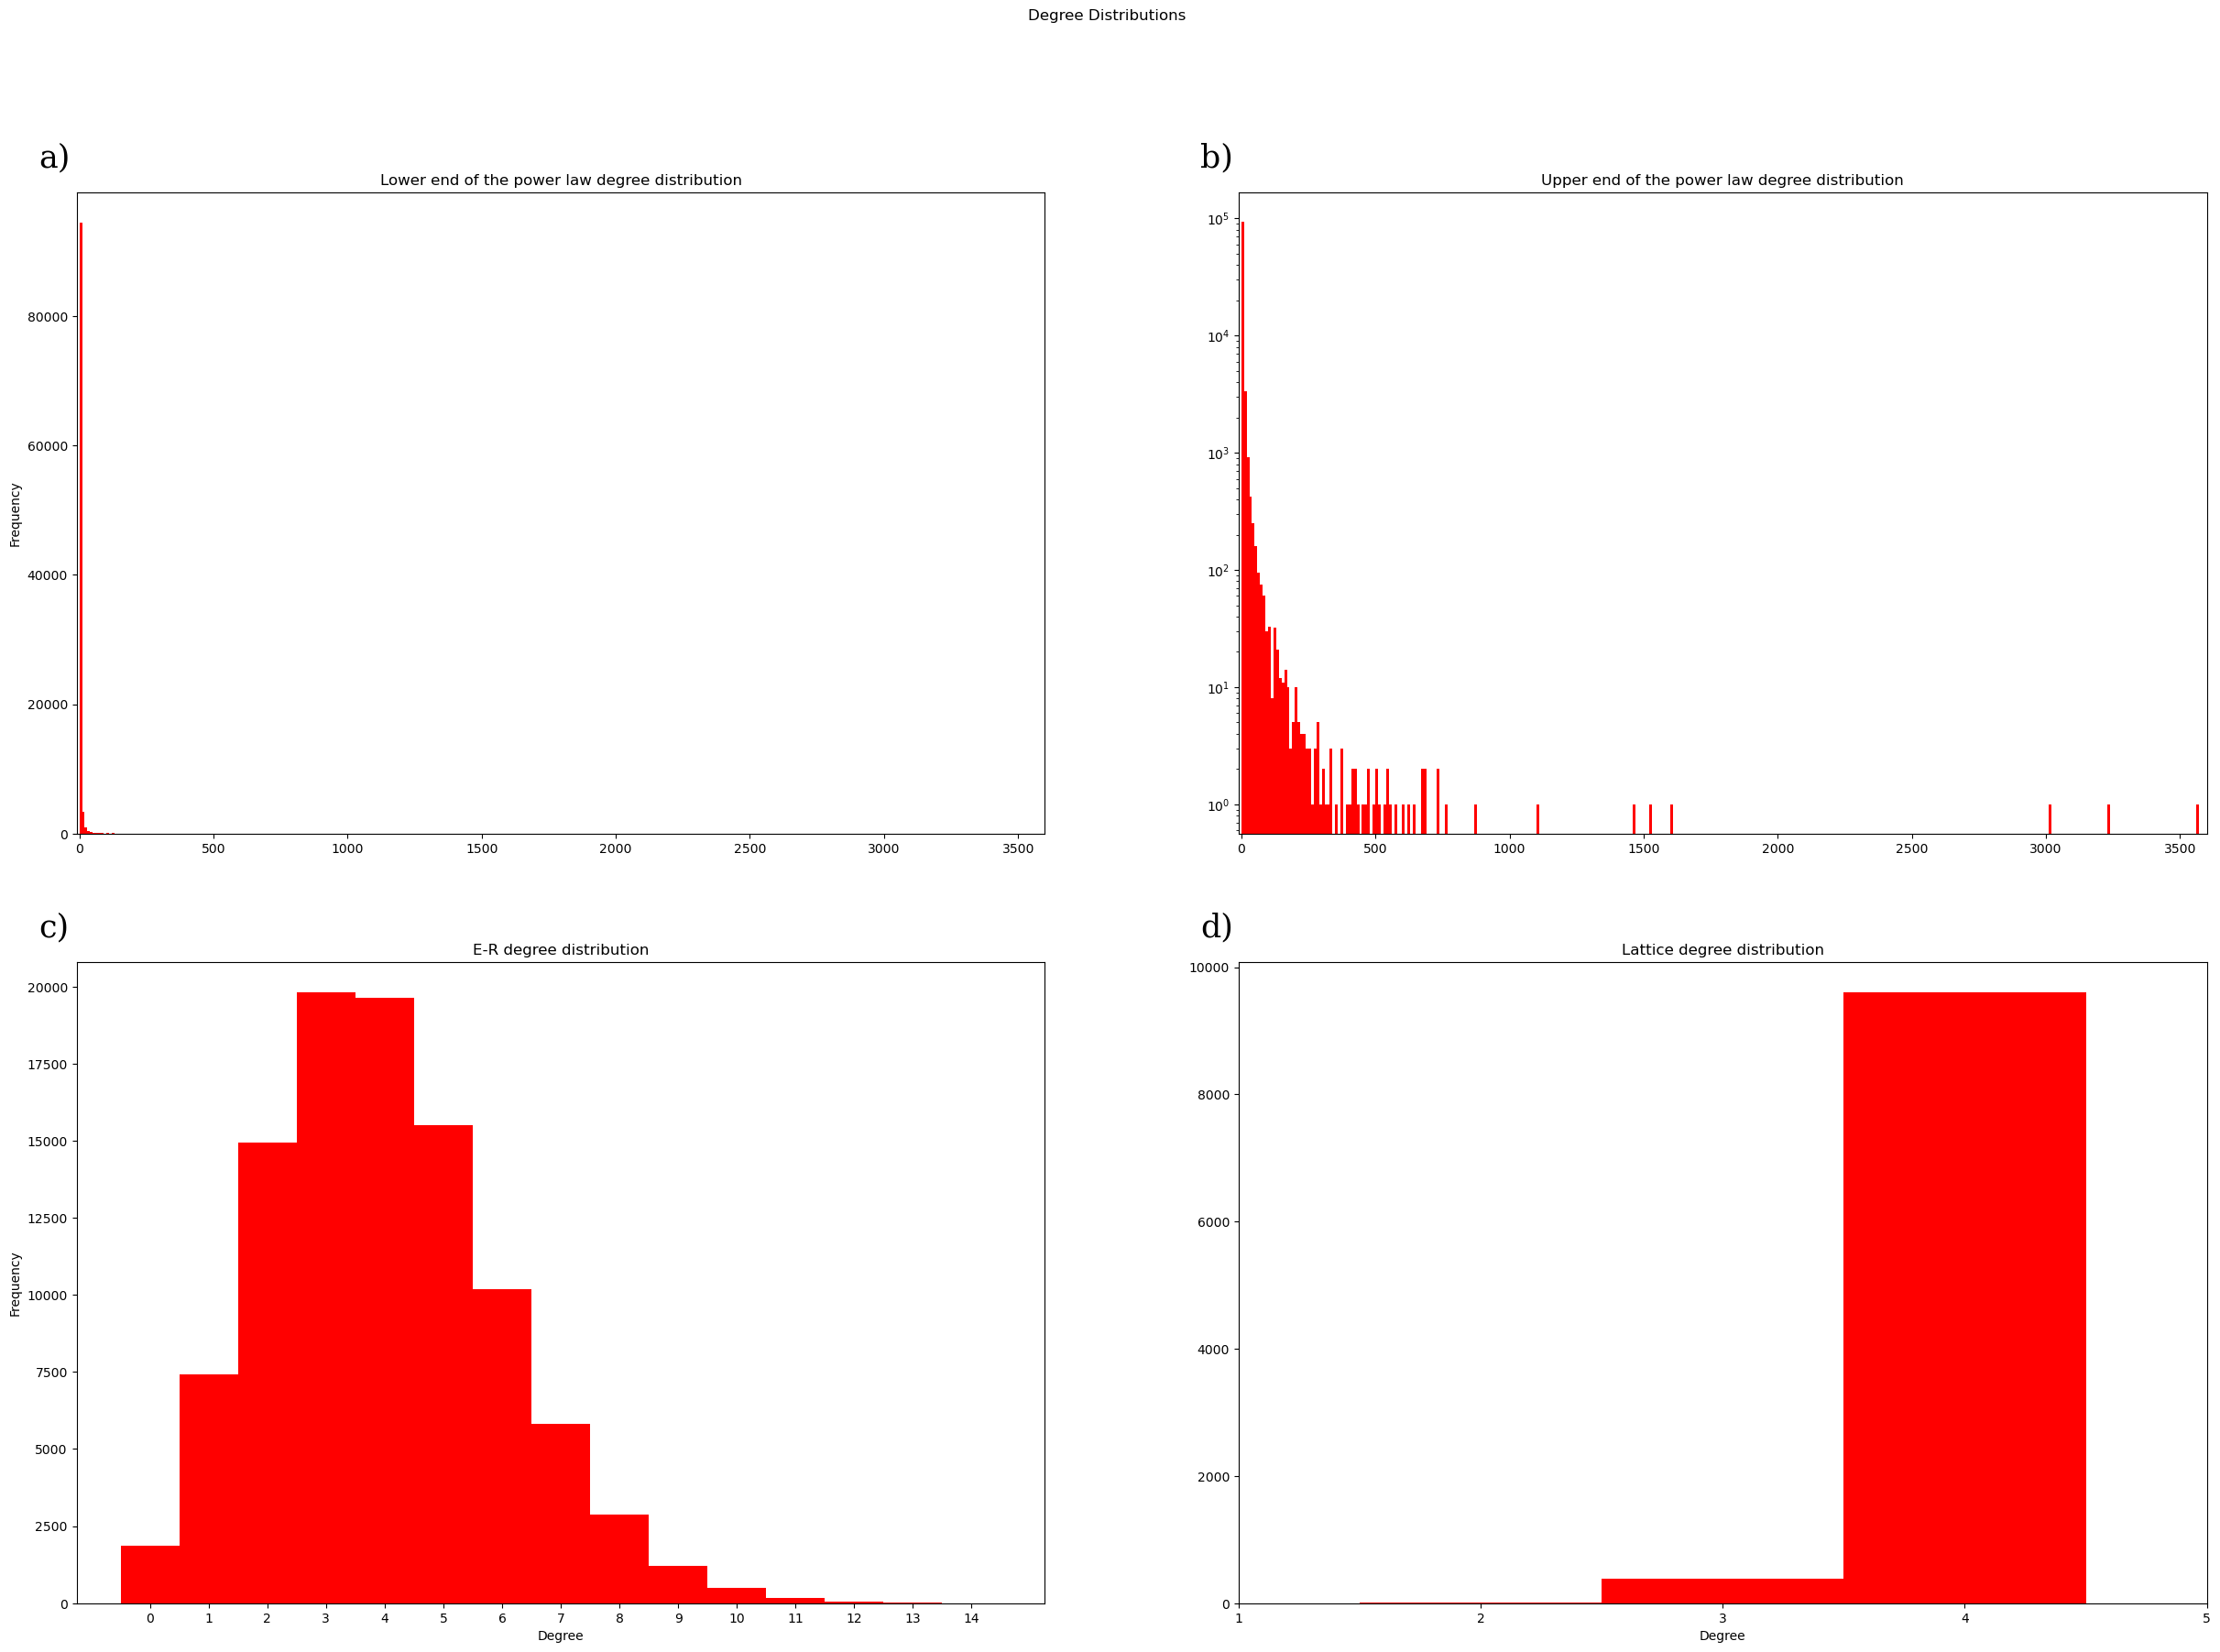

In [12]:
fig, ax = plt.subplots(2,2,figsize = (30,20))
fig.suptitle("Degree Distributions")
ax[0][0].hist(degrees_power,bins = bins3,color = "r")
ax[0][0].set_xlim(-10,3600)
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_title("Lower end of the power law degree distribution")

trans = mtransforms.ScaledTranslation(-30/72, 15/72, fig.dpi_scale_trans)
ax[0][0].text(0.0, 1.0, "a)", transform=ax[0][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


ax[0][1].hist(degrees_power,bins = bins3,color = "r")
ax[0][1].set_xlim(-10,3600)
ax[0][1].set_title("Upper end of the power law degree distribution")
ax[0][1].set_yscale("log")

ax[0][1].text(0.0, 1.0, "b)", transform=ax[0][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[1][0].hist(degrees_er,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5],color = "r")
ax[1][0].set_ylabel("Frequency")
ax[1][0].set_xlabel("Degree")
ax[1][0].set_title("E-R degree distribution")
ax[1][0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

ax[1][0].text(0.0, 1.0, "c)", transform=ax[1][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


ax[1][1].hist(degrees_grid,color = "r",bins = [1.5,2.5,3.5,4.5])
ax[1][1].set_xlabel("Degree")
ax[1][1].set_xlim(1,5)
ax[1][1].set_title("Lattice degree distribution")
ax[1][1].set_xticks([1,2,3,4,5])

ax[1][1].text(0.0, 1.0, "d)", transform=ax[1][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)

plt.savefig("images/degree_distributions.png",bbox_inches='tight')

In [13]:
degrees_1 = []
degrees_15 = []
degrees_2 = []
degrees_3 = []

with open(('networks/grid.pkl'), 'rb') as f:
        G = load(f)
degrees_grid = [G.degree(n) for n in G.nodes]

for i in range(1,11,1):
    filename = "networks/grid_r_D=1_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_1.extend([G.degree(n) for n in G.nodes])
  
    filename = "networks/grid_r_D=1.5_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_15.extend([G.degree(n) for n in G.nodes])
        
    filename = "networks/grid_r_D=2_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_2.extend([G.degree(n) for n in G.nodes])
    
    filename = "networks/grid_r_D=3_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_3.extend([G.degree(n) for n in G.nodes])

In [14]:
bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]

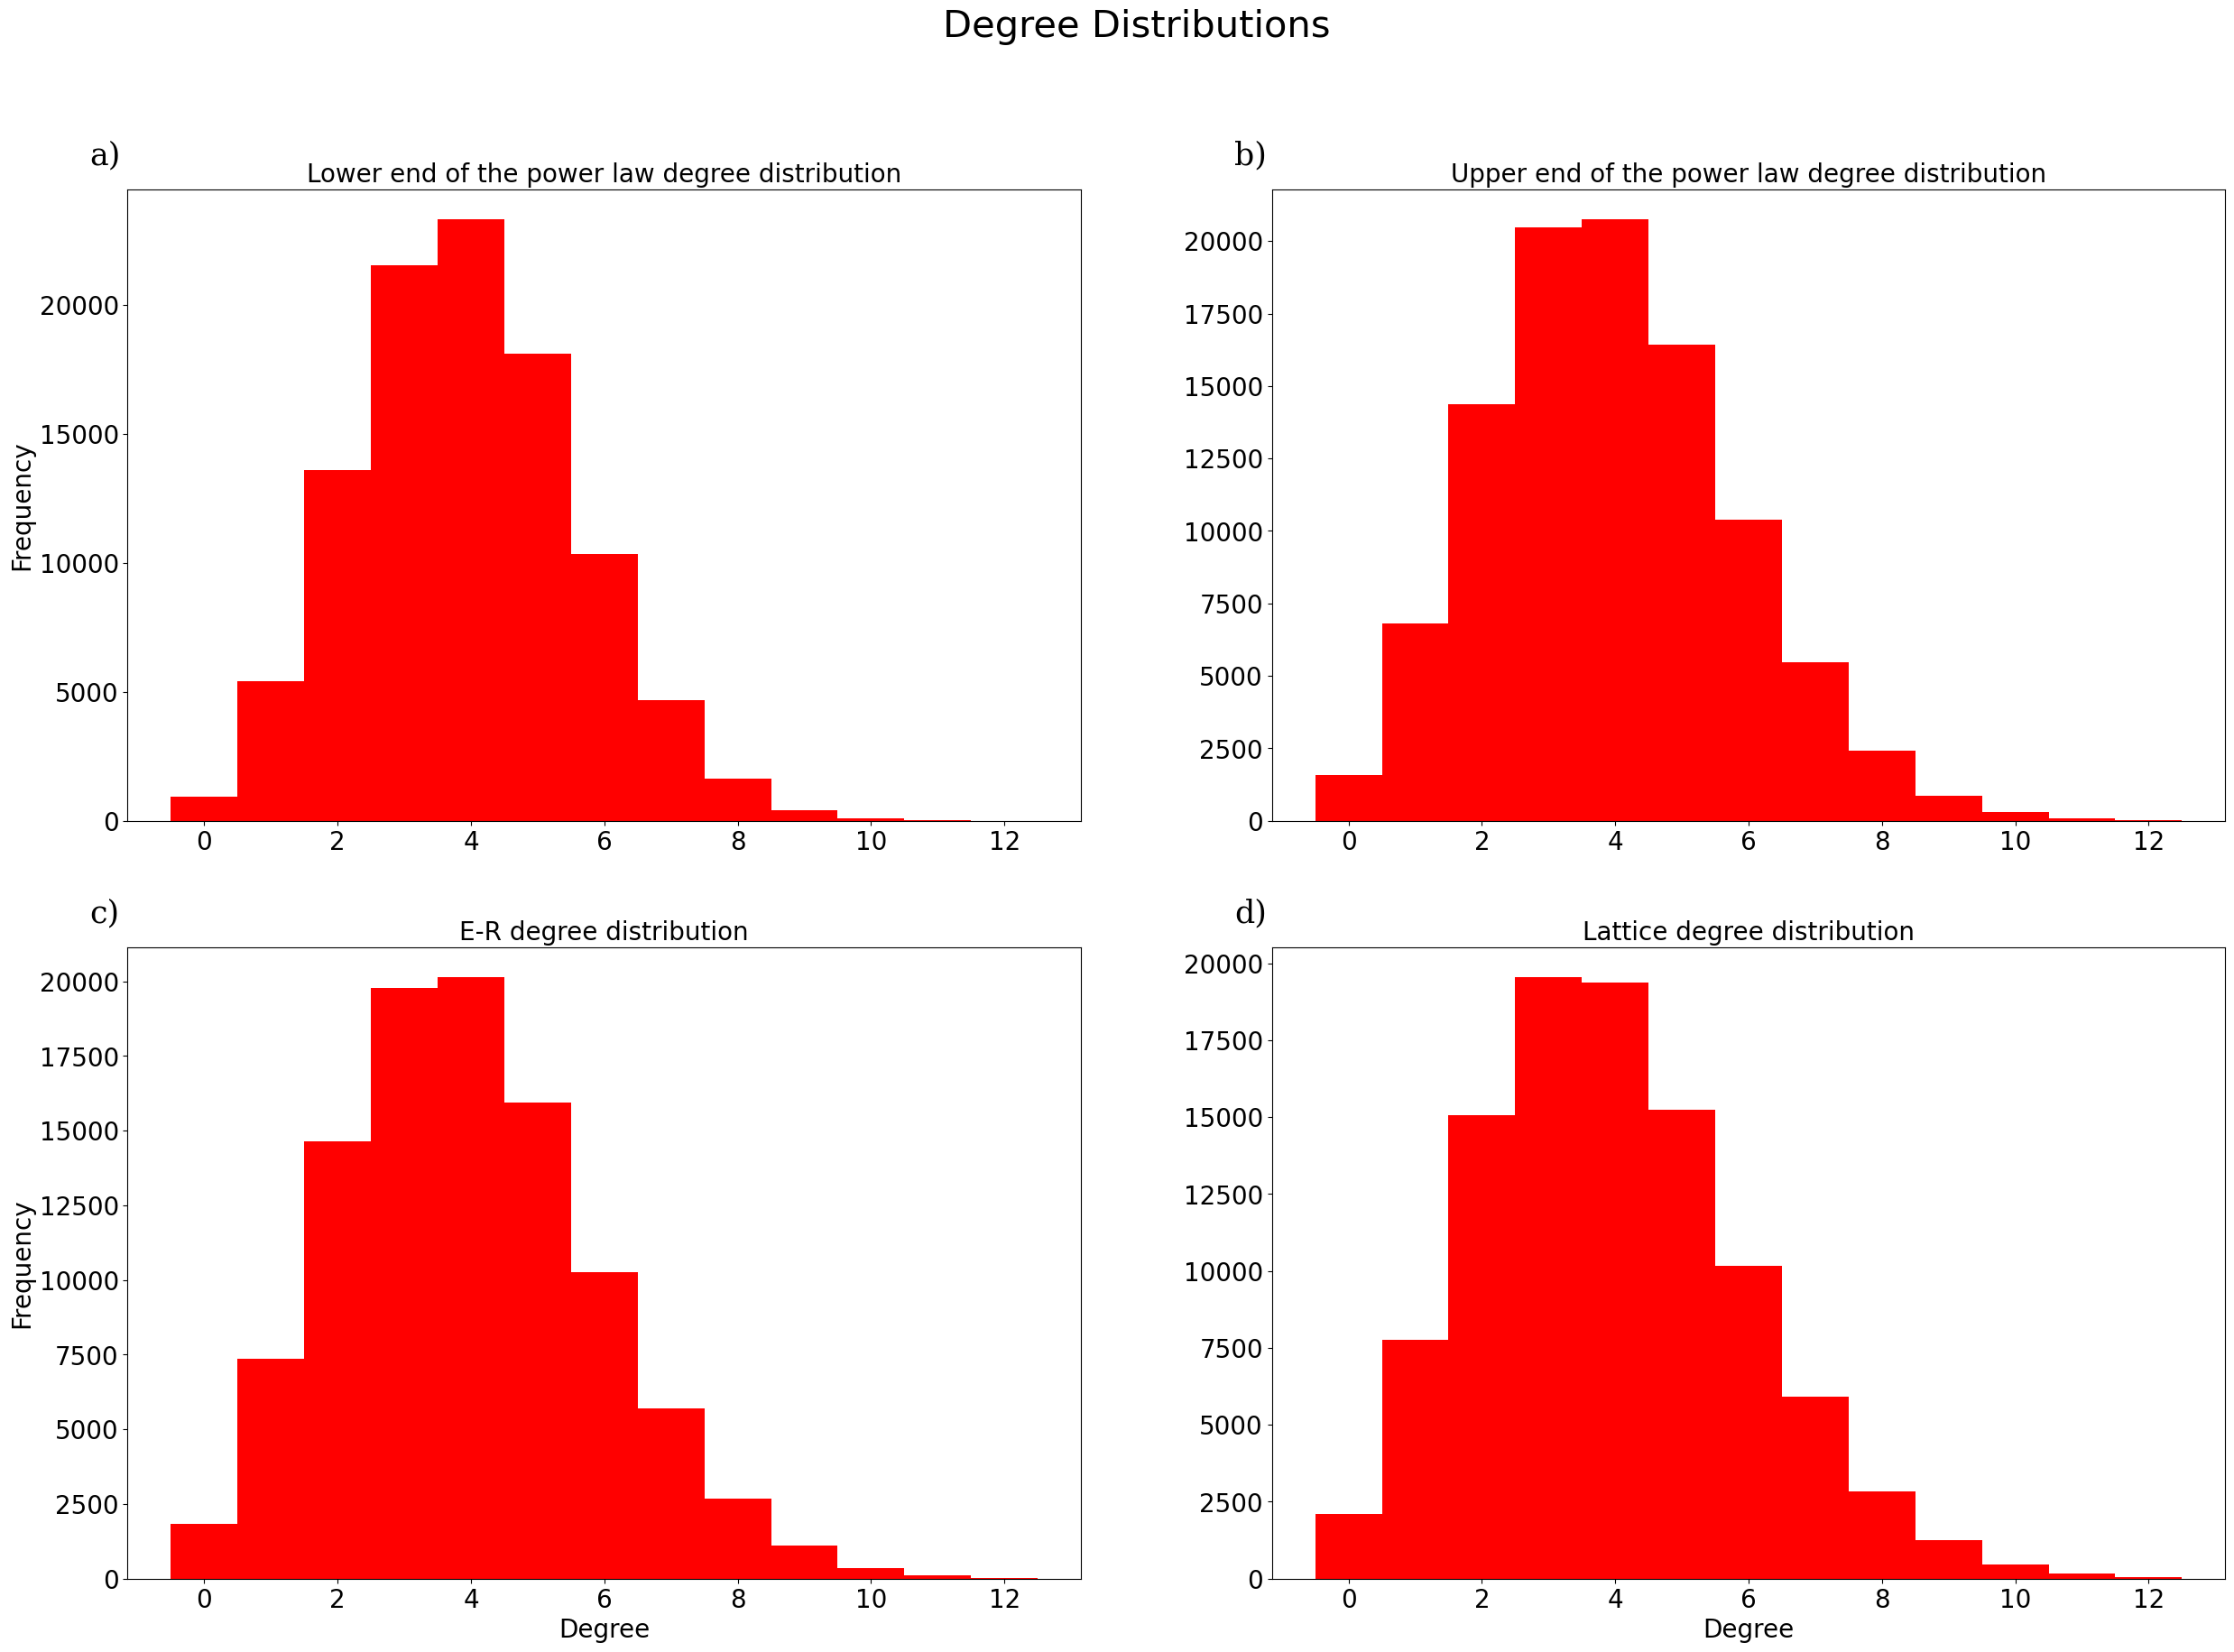

In [15]:
fig, ax = plt.subplots(2,2,figsize = (30,20))
fig.suptitle("Degree Distributions ")
ax[0][0].hist(degrees_1,color = "r",bins = bins)
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_title("Lower end of the power law degree distribution")

trans = mtransforms.ScaledTranslation(-30/72, 15/72, fig.dpi_scale_trans)
ax[0][0].text(0.0, 1.0, "a)", transform=ax[0][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


ax[0][1].hist(degrees_15,color = "r",bins = bins)
ax[0][1].set_title("Upper end of the power law degree distribution")

ax[0][1].text(0.0, 1.0, "b)", transform=ax[0][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[1][0].hist(degrees_2,color = "r",bins = bins)
ax[1][0].set_ylabel("Frequency")
ax[1][0].set_xlabel("Degree")
ax[1][0].set_title("E-R degree distribution")


ax[1][0].text(0.0, 1.0, "c)", transform=ax[1][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


ax[1][1].hist(degrees_3,color = "r",bins = bins)
ax[1][1].set_xlabel("Degree")
ax[1][1].set_title("Lattice degree distribution")


ax[1][1].text(0.0, 1.0, "d)", transform=ax[1][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)

plt.savefig("images/degree_distributions2.png",bbox_inches='tight')

## Connectivity Plots

In [16]:
def connectivity(G,node):
    N = len(G.nodes)
    results = [[node]]
    connected = [node]
    new_connections = [node]
    while (new_connections != []):
       
        last_connections = new_connections

        new_connections = []
        
        for node2 in last_connections:
            for node3 in G.neighbors(node2):
                if (node3 not in new_connections) and (node3 not in connected):
                    new_connections.append(node3)        
       
        connected.extend(new_connections)
        results.append(connected.copy())
     
    
    return [len(i)/N for i in results]

In [17]:
con_data_grid = []
filename = "networks/grid.pkl"
with open((filename), 'rb') as f:
    G = load(f)
    
for j in tqdm(range(100)):
    n = random.choice(list(G.nodes))
    con_data_grid.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid])

for data in con_data_grid:
    while len(data)<end:
        data.append(data[-1])
    

100%|██████████| 100/100 [11:38<00:00,  6.98s/it]


In [18]:
LI_g = []
UI_g = []
med_g = []
for i in range(len(con_data_grid[0])):
    L = []
    for j in con_data_grid:
        L.append(j[i])

    LI_g.append(np.percentile(L,2.5))
    UI_g.append(np.percentile(L,97.5))
    med_g.append(np.percentile(L,50))

In [19]:
con_data_grid_r_1 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=1_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_1.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_1])

for data in con_data_grid_r_1:
    while len(data)<end:
        data.append(data[-1])
    

In [20]:
LI_1 = []
UI_1 = []
med_1 = []
for i in range(len(con_data_grid_r_1[0])):
    L = []
    for j in con_data_grid_r_1:
        L.append(j[i])

    LI_1.append(np.percentile(L,2.5))
    UI_1.append(np.percentile(L,97.5))
    med_1.append(np.percentile(L,50))

In [21]:
con_data_grid_r_15 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=1.5_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_15.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_15])

for data in con_data_grid_r_15:
    while len(data)<end:
        data.append(data[-1])
    

In [22]:
LI_15 = []
UI_15 = []
med_15 = []
for i in range(len(con_data_grid_r_15[0])):
    L = []
    for j in con_data_grid_r_15:
        L.append(j[i])

    LI_15.append(np.percentile(L,2.5))
    UI_15.append(np.percentile(L,97.5))
    med_15.append(np.percentile(L,50))

In [35]:
con_data_grid_r_2 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=2_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_2.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_2])

for data in con_data_grid_r_2:
    while len(data)<end:
        data.append(data[-1])
    

In [36]:
LI_2 = []
UI_2 = []
med_2 = []
for i in range(len(con_data_grid_r_2[0])):
    L = []
    for j in con_data_grid_r_2:
        L.append(j[i])

    LI_2.append(np.percentile(L,2.5))
    UI_2.append(np.percentile(L,97.5))
    med_2.append(np.percentile(L,50))

In [45]:
con_data_grid_r_3 = []
for i in tqdm(range(1,11,1)):
    filename = "networks/grid_r_D=3_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_grid_r_3.append(c)
end = max([len(k) for k in con_data_grid_r_3])

for data in con_data_grid_r_3:
    while len(data)<end:
        data.append(data[-1])
    

100%|██████████| 10/10 [05:12<00:00, 31.26s/it]


In [46]:
LI_3 = []
UI_3 = []
med_3 = []
for i in range(len(con_data_grid_r_3[0])):
    L = []
    for j in con_data_grid_r_3:
        L.append(j[i])

    LI_3.append(np.percentile(L,2.5))
    UI_3.append(np.percentile(L,97.5))
    med_3.append(np.percentile(L,50))

In [27]:
con_data_er = []
for i in range(1,11,1):
    filename = "networks/er" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_er.append(c)
        
end = max([len(k) for k in con_data_er])

for data in con_data_er:
    while len(data)<end:
        data.append(data[-1])
    

In [28]:
LI_er = []
UI_er = []
med_er = []
for i in range(len(con_data_er[0])):
    L = []
    for j in con_data_er:
        L.append(j[i])

    LI_er.append(np.percentile(L,2.5))
    UI_er.append(np.percentile(L,97.5))
    med_er.append(np.percentile(L,50))

In [29]:
con_data_power = []
for i in range(1,11,1):
    filename = "networks/powerlaw" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_power.append(c)
end = max([len(k) for k in con_data_power])

for data in con_data_power:
    while len(data)<end:
        data.append(data[-1])
    

In [30]:
LI_power = []
UI_power = []
med_power = []
for i in range(len(con_data_power[0])):
    L = []
    for j in con_data_power:
        L.append(j[i])

    LI_power.append(np.percentile(L,2.5))
    UI_power.append(np.percentile(L,97.5))
    med_power.append(np.percentile(L,50))

In [47]:
#M = len(UI_g)
M=200
D = [UI_1,LI_1,med_1,UI_15,LI_15,med_15,UI_2,LI_2,med_2,UI_3,LI_3,med_3,UI_er,LI_er,med_er,UI_power,LI_power,med_power]
for d in D:
    while len(d)<M:
        d.append(d[-1])

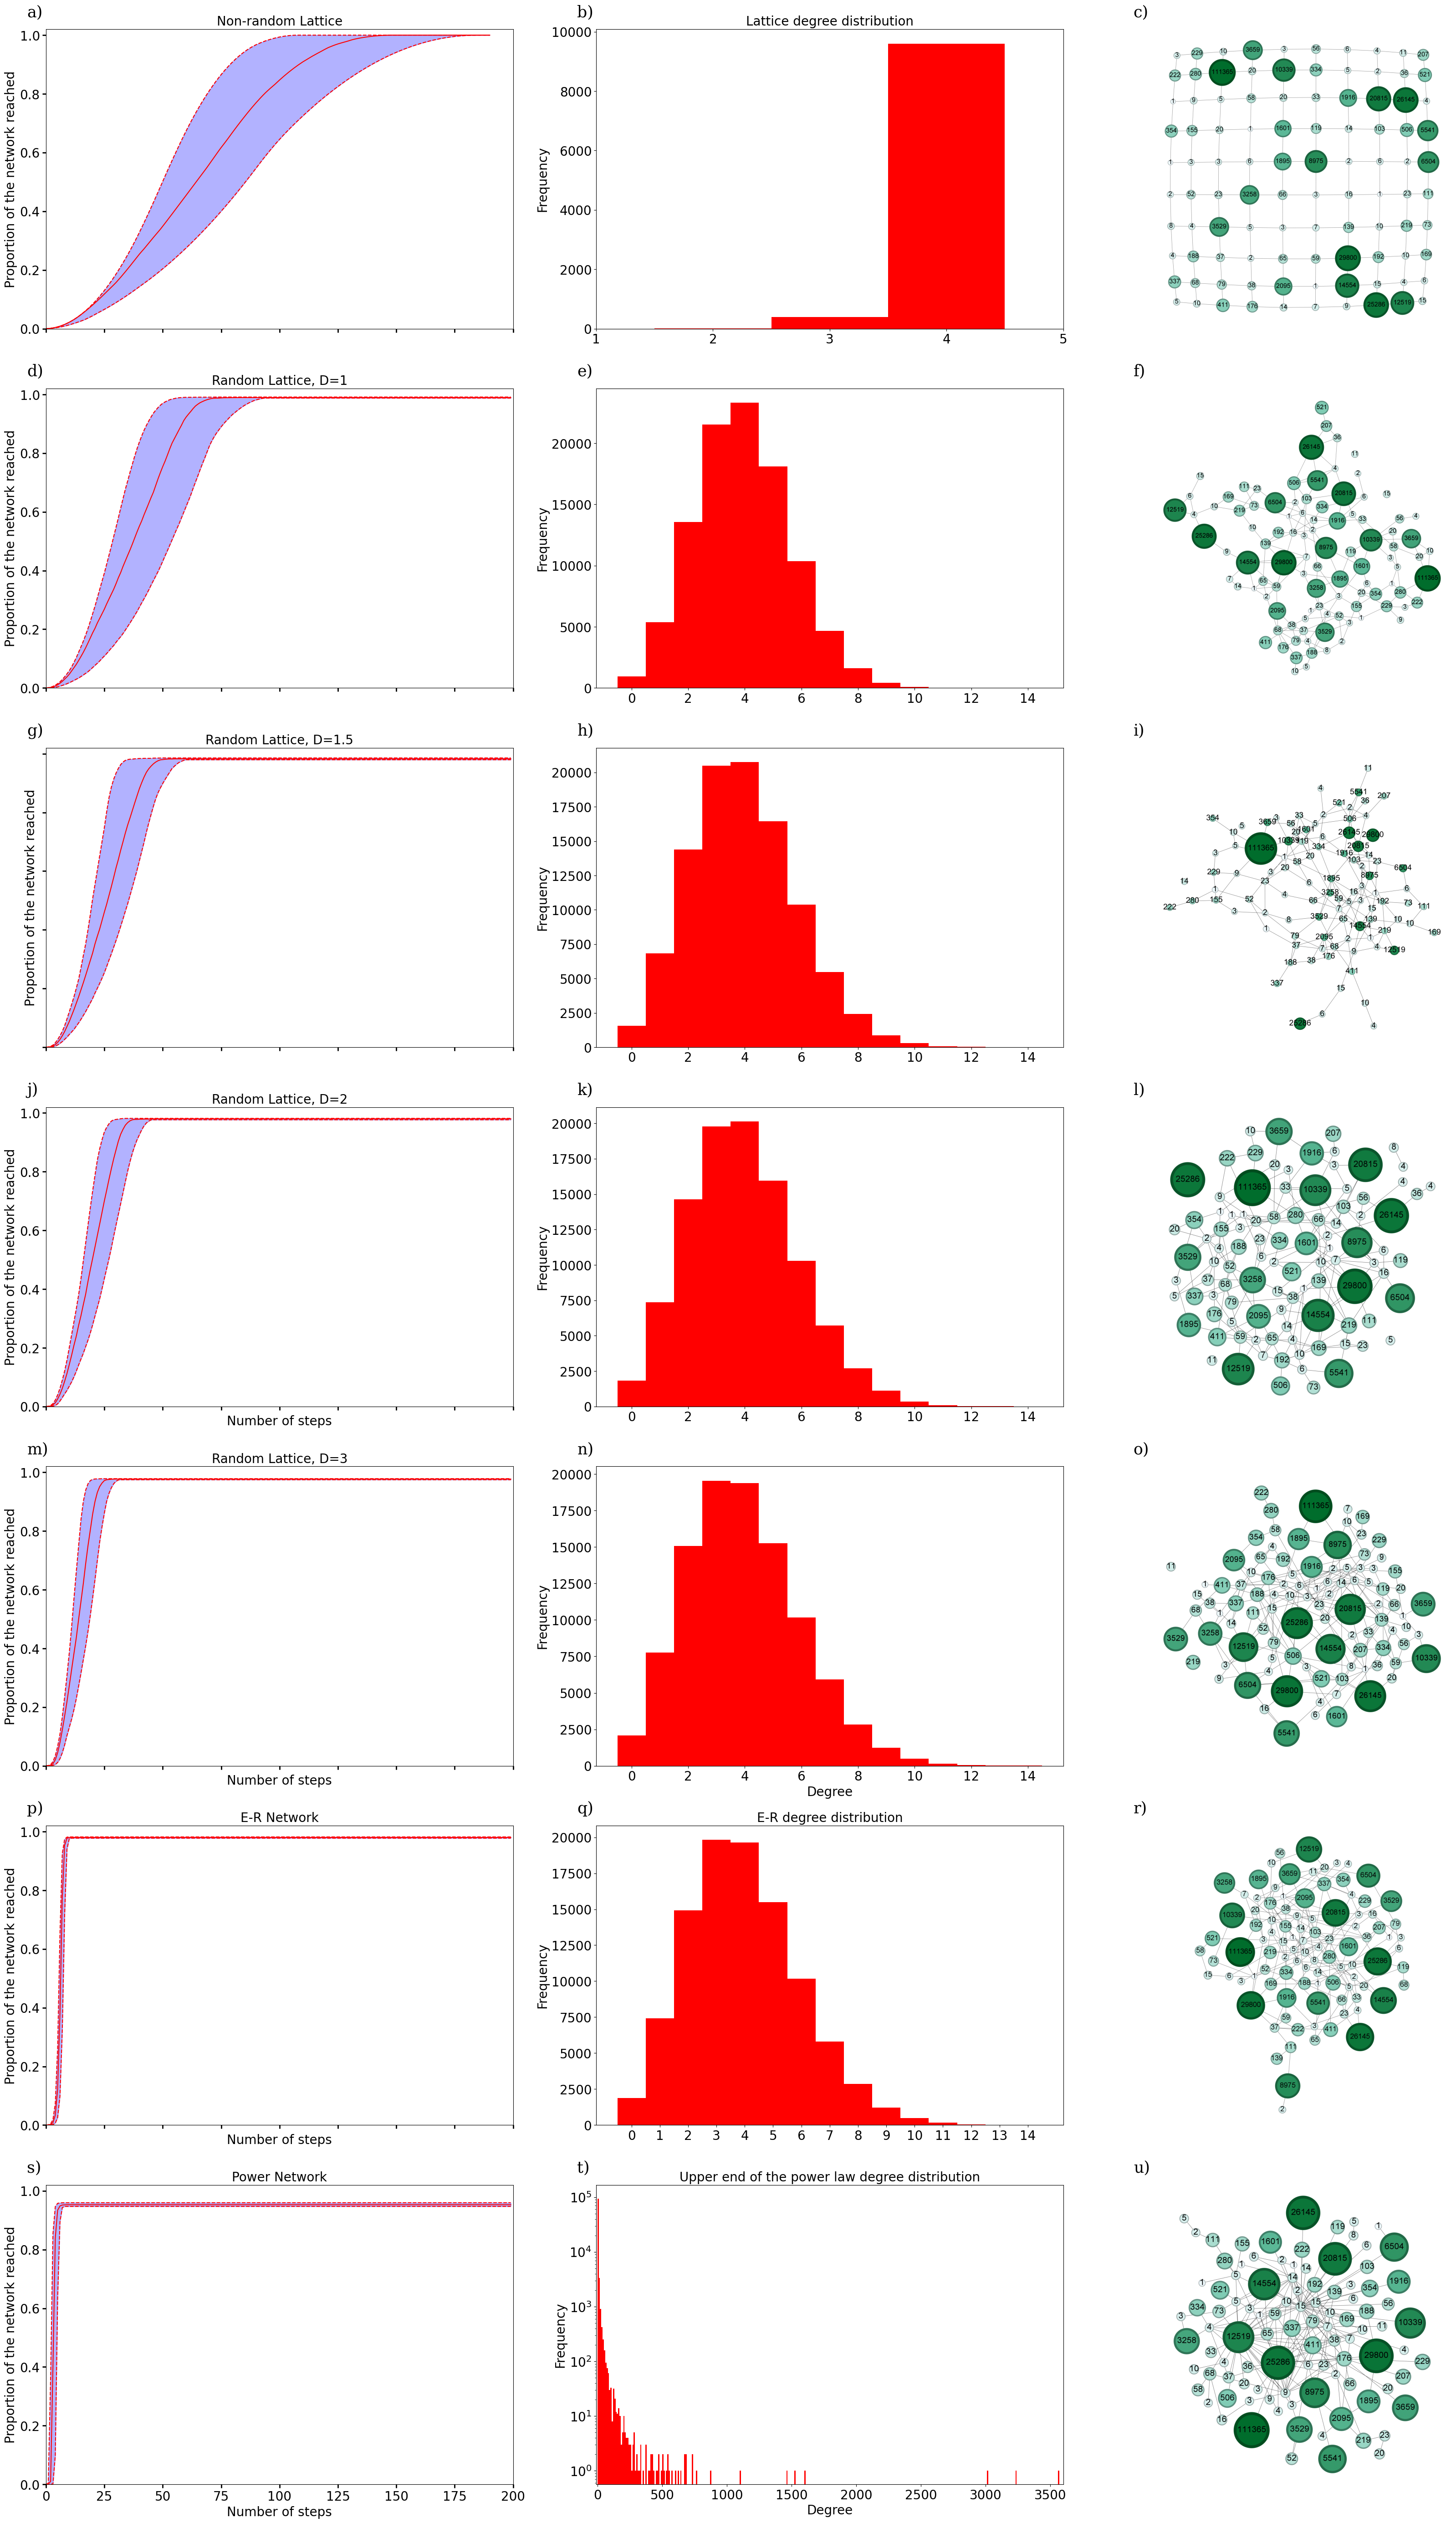

In [48]:
fig, ax = plt.subplots(7,3,figsize = (40,70),gridspec_kw={'width_ratios': [3,3, 2]})

Xg = np.linspace(0,len(LI_g)-1,len(LI_g))
ax[0][0].plot(LI_g,color = "r",linestyle = "--")
ax[0][0].plot(UI_g,color = "r",linestyle = "--")
ax[0][0].plot(med_g,color = "r",linestyle = "-")
ax[0][0].fill_between(Xg,LI_g,UI_g,color = "b", alpha = 0.3)
ax[0][0].set_xticklabels([])
ax[0][0].set_ylabel("Proportion of the network reached")
ax[0][0].set_title("Non-random Lattice")

trans = mtransforms.ScaledTranslation(-30/72, 15/72, fig.dpi_scale_trans)
ax[0][0].text(0.0, 1.0, "a)", transform=ax[0][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


X1 = np.linspace(0,len(LI_1)-1,len(LI_1))
ax[1][0].plot(LI_1,color = "r",linestyle = "--")
ax[1][0].plot(UI_1,color = "r",linestyle = "--")
ax[1][0].plot(med_1,color = "r",linestyle = "-")
ax[1][0].fill_between(X1,LI_1,UI_1,color = "b", alpha = 0.3)
ax[1][0].set_xticklabels([])
ax[1][0].set_ylabel("Proportion of the network reached")
ax[1][0].set_title("Random Lattice, D=1")


ax[1][0].text(0.0, 1.0, "d)", transform=ax[1][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

X15 = np.linspace(0,len(LI_15)-1,len(LI_15))
ax[2][0].plot(LI_15,color = "r",linestyle = "--")
ax[2][0].plot(UI_15,color = "r",linestyle = "--")
ax[2][0].plot(med_15,color = "r",linestyle = "-")
ax[2][0].fill_between(X15,LI_15,UI_15,color = "b", alpha = 0.3)
ax[2][0].set_ylabel("Proportion of the network reached")
ax[2][0].set_xticklabels([])
ax[2][0].set_yticklabels([])
ax[2][0].set_title("Random Lattice, D=1.5")


ax[2][0].text(0.0, 1.0, "g)", transform=ax[2][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


X2 = np.linspace(0,len(LI_2)-1,len(LI_2))
ax[3][0].plot(LI_2,color = "r",linestyle = "--")
ax[3][0].plot(UI_2,color = "r",linestyle = "--")
ax[3][0].plot(med_2,color = "r",linestyle = "-")
ax[3][0].fill_between(X2,LI_2,UI_2,color = "b", alpha = 0.3)
ax[3][0].set_xticklabels([])
ax[3][0].set_ylabel("Proportion of the network reached")
ax[3][0].set_xlabel("Number of steps")
ax[3][0].set_title("Random Lattice, D=2")

ax[3][0].text(0.0, 1.0, "j)", transform=ax[3][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')





X3 = np.linspace(0,len(LI_3)-1,len(LI_3))
ax[4][0].plot(LI_3,color = "r",linestyle = "--")
ax[4][0].plot(UI_3,color = "r",linestyle = "--")
ax[4][0].plot(med_3,color = "r",linestyle = "-")
ax[4][0].fill_between(X3,LI_3,UI_3,color = "b", alpha = 0.3)
ax[4][0].set_ylabel("Proportion of the network reached")
ax[4][0].set_xlabel("Number of steps")
ax[4][0].set_xticklabels([])
ax[4][0].set_ylabel("Proportion of the network reached")
ax[4][0].set_title("Random Lattice, D=3")

ax[4][0].text(0.0, 1.0, "m)", transform=ax[4][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

Xer = np.linspace(0,len(LI_er)-1,len(LI_er))
ax[5][0].plot(LI_er,color = "r",linestyle = "--")
ax[5][0].plot(UI_er,color = "r",linestyle = "--")
ax[5][0].plot(med_er,color = "r",linestyle = "-")
ax[5][0].fill_between(Xer,LI_er,UI_er,color = "b", alpha = 0.3, label = "95% Confidence Interval")
ax[5][0].set_xticklabels([])
ax[5][0].set_xlabel("Number of steps")
ax[5][0].set_ylabel("Proportion of the network reached")
ax[5][0].set_title("E-R Network")


ax[5][0].text(0.0, 1.0, "p)", transform=ax[5][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')



Xpower = np.linspace(0,len(LI_power)-1,len(LI_power))
ax[6][0].plot(LI_power,color = "r",linestyle = "--")
ax[6][0].plot(UI_power,color = "r",linestyle = "--")
ax[6][0].plot(med_power,color = "r",linestyle = "-")
ax[6][0].set_ylabel("Proportion of the network reached")
ax[6][0].fill_between(Xpower,LI_power,UI_power,color = "b", alpha = 0.3, label = "95% Confidence Interval")
ax[6][0].set_xlabel("Number of steps")
ax[6][0].set_title("Power Network")


ax[6][0].text(0.0, 1.0, "s)", transform=ax[6][0].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

for i in range(7):
    ax[i][0].set_xlim(0,M)
    ax[i][0].tick_params(width = 2, length = 6)
    ax[i][0].set_ylim(0,1.02)
    
  



ax[6][1].hist(degrees_power,bins = bins3,color = "r")
ax[6][1].set_ylabel("Frequency")
ax[6][1].set_xlabel("Degree")
ax[6][1].set_xlim(-10,3600)
ax[6][1].set_title("Upper end of the power law degree distribution")
ax[6][1].set_yscale("log")

ax[6][1].text(0.0, 1.0, "t)", transform=ax[6][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[5][1].hist(degrees_er,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5],color = "r")
ax[5][1].set_ylabel("Frequency")
ax[5][1].set_title("E-R degree distribution")
ax[5][1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

ax[5][1].text(0.0, 1.0, "q)", transform=ax[5][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[0][1].hist(degrees_grid,color = "r",bins = [1.5,2.5,3.5,4.5])
ax[0][1].set_ylabel("Frequency")
ax[0][1].set_xlim(1,5)
ax[0][1].set_title("Lattice degree distribution")
ax[0][1].set_xticks([1,2,3,4,5])

ax[0][1].text(0.0, 1.0, "b)", transform=ax[0][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[1][1].hist(degrees_1,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[1][1].set_ylabel("Frequency")
ax[1][1].set_title("")

ax[1][1].text(0.0, 1.0, "e)", transform=ax[1][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[2][1].hist(degrees_15,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[2][1].set_ylabel("Frequency")
ax[2][1].set_title("")

ax[2][1].text(0.0, 1.0, "h)", transform=ax[2][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


ax[3][1].hist(degrees_2,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[3][1].set_ylabel("Frequency")
ax[3][1].set_title("")

ax[3][1].text(0.0, 1.0, "k)", transform=ax[3][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

ax[4][1].hist(degrees_3,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[4][1].set_ylabel("Frequency")
ax[4][1].set_xlabel("Degree")
ax[4][1].set_title("")

ax[4][1].text(0.0, 1.0, "n)", transform=ax[4][1].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')



    
    
img = mpimg.imread('small networks/grid.png')
ax[0][2].imshow(img)
ax[0][2].axis("off")

ax[0][2].text(0.0, 1.0, "c)", transform=ax[0][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

img = mpimg.imread('small networks/grid_r_D=1.png')
ax[1][2].imshow(img)
ax[1][2].axis("off")

ax[1][2].text(0.0, 1.0, "f)", transform=ax[1][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

img = mpimg.imread('small networks/grid_r_D=15.png')
ax[2][2].imshow(img)
ax[2][2].axis("off")

ax[2][2].text(0.0, 1.0, "i)", transform=ax[2][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


img = mpimg.imread('small networks/grid_r_D=2.png')
ax[2+1][2].imshow(img)
ax[2+1][2].axis("off")

ax[3][2].text(0.0, 1.0, "l)", transform=ax[3][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

img = mpimg.imread('small networks/grid_r_D=3.png')
ax[3+1][2].imshow(img)
ax[3+1][2].axis("off")

ax[4][2].text(0.0, 1.0, "o)", transform=ax[4][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

img = mpimg.imread('small networks/er.png')
ax[4+1][2].imshow(img)
ax[4+1][2].axis("off")

ax[5][2].text(0.0, 1.0, "r)", transform=ax[5][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')

img = mpimg.imread('small networks/power.png')
ax[5+1][2].imshow(img)
ax[5+1][2].axis("off")
ax[6][2].text(0.0, 1.0, "u)", transform=ax[6][2].transAxes + trans,
            fontsize=25, va='bottom', fontfamily='serif')


plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)

plt.savefig("images/connectivity_plots.png",bbox_inches='tight',dpi =100)

## Small Network Examples

In [11]:
fit_alpha,fit_beta,fit_loc,fit_scale = 1.4709515345874549,3.9521542417123277,-0.024762702437304038,6.7

In [621]:
n = 10

G_grid = generate_premises_grid(n,n)
pop = pd.Series(stats.beta.rvs(fit_alpha,fit_beta, loc=fit_loc, scale=fit_scale, size = len(G_grid.nodes))).map(lambda x: round(10**x))
add_premise_pop(G_grid,pop,365)
nx.write_gexf(G_grid, "small networks/grid.gexf")

deg_sum_grid = sum([G_grid.degree(n) for n in G_grid.nodes])

er_power = 4/(n*(n-1))
deg_sum_er = 0
while abs((deg_sum_grid-deg_sum_er)/deg_sum_grid)>0.01:
    G_er = generate_premises_er(n*n,er_power)
    add_premise_pop(G_er,pop,365)
    deg_sum_er = sum([G_er.degree(n) for n in G_er.nodes])
nx.write_gexf(G_er, "small networks/er.gexf")

power = (7*n-8)/(3*n-4)
deg_sum_power = 0
while abs((deg_sum_grid-deg_sum_power)/deg_sum_grid)>0.01:
    G_power = generate_premises_power_law(n*n,power)
    add_premise_pop(G_power,pop,365)
    deg_sum_power = sum([G_power.degree(n) for n in G_power.nodes])
nx.write_gexf(G_power, "small networks/power.gexf")

P = 0.8
deg_sum_grid_r1 = 0
while abs((deg_sum_grid-deg_sum_grid_r1)/deg_sum_grid)>0.01:
    G_grid_r1 = generate_premises_grid_random(10,10,P,1)
    add_premise_pop(G_grid_r1,pop,365)
    deg_sum_grid_r1 = sum([G_grid_r1.degree(n) for n in G_grid_r1.nodes])
nx.write_gexf(G_grid_r1, "small networks/grid_r_D=1.gexf")

P = 0.22
deg_sum_grid_r2 = 0
while abs((deg_sum_grid-deg_sum_grid_r2)/deg_sum_grid)>0.01:
    G_grid_r2 = generate_premises_grid_random(10,10,P,2)
    add_premise_pop(G_grid_r2,pop,365)
    deg_sum_grid_r2 = sum([G_grid_r2.degree(n) for n in G_grid_r2.nodes])
nx.write_gexf(G_grid_r2, "small networks/grid_r_D=2.gexf")

P = 0.11
deg_sum_grid_r3 = 0
while abs((deg_sum_grid-deg_sum_grid_r3)/deg_sum_grid)>0.01:
    G_grid_r3 = generate_premises_grid_random(10,10,P,3)
    add_premise_pop(G_grid_r3,pop,365)
    deg_sum_grid_r3 = sum([G_grid_r3.degree(n) for n in G_grid_r3.nodes])
nx.write_gexf(G_grid_r3, "small networks/grid_r_D=3.gexf")

In [683]:
P = 0.35
deg_sum_grid_r15 = 0
while abs((deg_sum_grid-deg_sum_grid_r15)/deg_sum_grid)>0.01:
    G_grid_r15 = generate_premises_grid_random(10,10,P,1.5)
    add_premise_pop(G_grid_r15,pop,365)
    deg_sum_grid_r15 = sum([G_grid_r15.degree(n) for n in G_grid_r15.nodes])
nx.write_gexf(G_grid_r15, "small networks/grid_r_D=15.gexf")

In [6]:
G = nx.read_gexf("small networks/grid_r_D=3.gexf")
G.nodes()

NodeView(('(0, 0)', '(0, 1)', '(0, 2)', '(0, 3)', '(0, 4)', '(0, 5)', '(0, 6)', '(0, 7)', '(0, 8)', '(0, 9)', '(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(1, 5)', '(1, 6)', '(1, 7)', '(1, 8)', '(1, 9)', '(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)', '(2, 4)', '(2, 5)', '(2, 6)', '(2, 7)', '(2, 8)', '(2, 9)', '(3, 0)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)', '(3, 5)', '(3, 6)', '(3, 7)', '(3, 8)', '(3, 9)', '(4, 0)', '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(4, 5)', '(4, 6)', '(4, 7)', '(4, 8)', '(4, 9)', '(5, 0)', '(5, 1)', '(5, 2)', '(5, 3)', '(5, 4)', '(5, 5)', '(5, 6)', '(5, 7)', '(5, 8)', '(5, 9)', '(6, 0)', '(6, 1)', '(6, 2)', '(6, 3)', '(6, 4)', '(6, 5)', '(6, 6)', '(6, 7)', '(6, 8)', '(6, 9)', '(7, 0)', '(7, 1)', '(7, 2)', '(7, 3)', '(7, 4)', '(7, 5)', '(7, 6)', '(7, 7)', '(7, 8)', '(7, 9)', '(8, 0)', '(8, 1)', '(8, 2)', '(8, 3)', '(8, 4)', '(8, 5)', '(8, 6)', '(8, 7)', '(8, 8)', '(8, 9)', '(9, 0)', '(9, 1)', '(9, 2)', '(9, 3)', '(9, 4)', '(9, 5)', '(9, 6)', '(9, 7)', '(9, 8)', 

In [30]:

for i in range(1,11,1):
    filename = "networks/grid_r_D=1_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    print(max([len(c) for c in nx.connected_components(G)]))

9907
9875
9890
9880
9894
9892
9902
9898
9887
9911
